In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data file
input_file = 'flows.csv'
flows = pd.read_csv(input_file)

In [3]:
# Filter flows greater than 10MB
flows = flows[flows['flow_size']>=10000]
flows

,protocol,src_port,dst_port,first_pkt_size,flow_size,packet_count,elephant
1,1,0,0,70,592410,8463,1
2,17,50005,3479,183,841789,4697,1
6,6,443,54447,1063,26214,76,0
9,6,47714,80,66,4429710,67041,1
11,6,993,52910,54,62100,1150,0
...,...,...,...,...,...,...,...
1809575,6,80,60086,66,1013053,407,1
1812172,6,60090,80,66,32761,604,0
1812294,6,80,60090,66,4888504,1814,1
1812695,17,443,60864,1242,11300,15,0


In [6]:
flows.head()

,protocol,src_port,dst_port,first_pkt_size,flow_size,packet_count,elephant
1,1,0,0,70,592410,8463,1
2,17,50005,3479,183,841789,4697,1
6,6,443,54447,1063,26214,76,0
9,6,47714,80,66,4429710,67041,1
11,6,993,52910,54,62100,1150,0


flows.describe()

In [6]:
flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6551 entries, 1 to 1814881
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   protocol        6551 non-null   int64
 1   src_port        6551 non-null   int64
 2   dst_port        6551 non-null   int64
 3   first_pkt_size  6551 non-null   int64
 4   flow_size       6551 non-null   int64
 5   packet_count    6551 non-null   int64
 6   elephant        6551 non-null   int64
dtypes: int64(7)
memory usage: 409.4 KB


In [7]:
# Features
unique_src_ports = len(flows['src_port'].unique())
unique_dst_ports = len(flows['dst_port'].unique())

unique_protocols = len(flows['protocol'].unique())

print(f'Unique Source Ports: {unique_src_ports}, Unique Destination Ports: {unique_dst_ports}')
print(f'Unique Protocols: {unique_protocols}')

Unique Source Ports: 1929, Unique Destination Ports: 4031
Unique Protocols: 5


In [8]:
flows['first_pkt_size'].value_counts()

66      2914
74      1407
1292     317
78       179
1242     158
        ... 
180        1
560        1
751        1
311        1
379        1
Name: first_pkt_size, Length: 381, dtype: int64

In [9]:
flows[flows['first_pkt_size'] == 66]['elephant'].value_counts()

elephant
0    1867
1    1047
Name: count, dtype: int64

In [6]:
flows[flows['dst_port'] == 0]['elephant'].value_counts()

elephant
0    41
1    21
Name: count, dtype: int64

In [22]:
flows.query('src_port==0 & dst_port==0 & elephant==1').value_counts()

protocol  src_port  dst_port  first_pkt_size  flow_size  packet_count  elephant
1         0         0         70              101640     1452          1           1
                              149             231556     1293          1           1
47        0         0         1514            74426276   127202        1           1
                              1286            10485039   10437         1           1
                              154             100393     608           1           1
                              102             50680760   160546        1           1
                              98              1994543    13525         1           1
1         0         0         200             246081     1215          1           1
                              176             281390     1345          1           1
                              161             1071335    5727          1           1
                              98              254914     209          

In [9]:
# Target
elephant_count = flows['elephant'].value_counts()
print(elephant_count)

0    4823
1    1728
Name: elephant, dtype: int64


In [10]:
elephant_count/ flows.shape[0] * 100

0    73.622348
1    26.377652
Name: elephant, dtype: float64

<BarContainer object of 6551 artists>

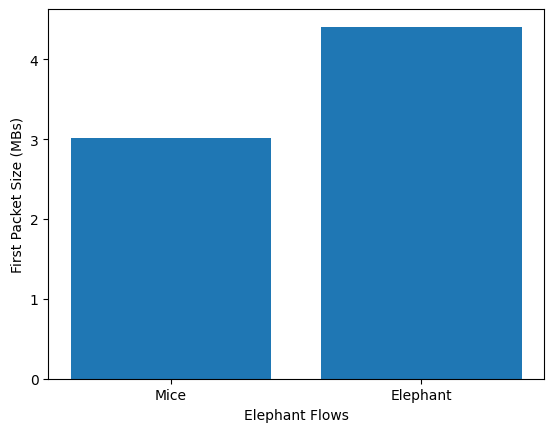

In [11]:
elephant = flows['elephant']
first_pkt_size = flows['first_pkt_size']/1000

fg, ax = plt.subplots()
ax.set_xlabel('Elephant Flows')
ax.set_ylabel('First Packet Size (MBs)')
ax.set_xticks([0, 1], ['Mice', 'Elephant'])

ax.bar(elephant, first_pkt_size)

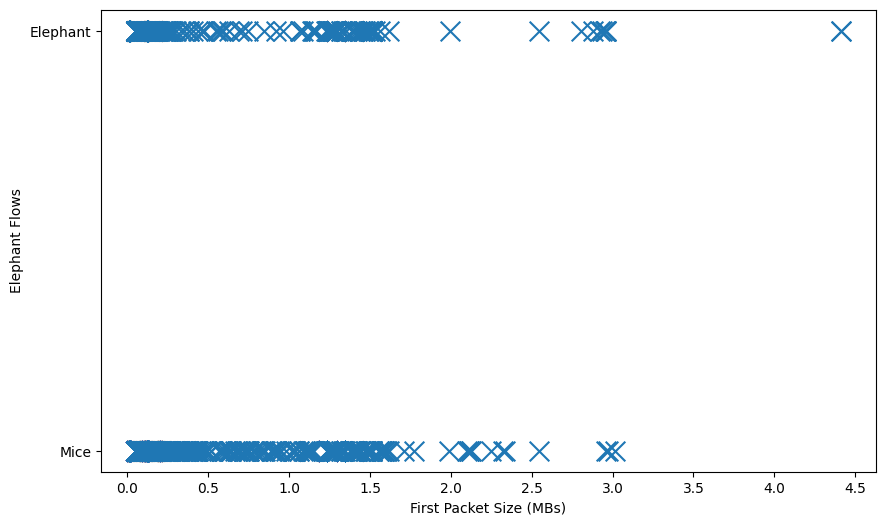

In [12]:
elephant = flows['elephant']
first_pkt_size = flows['first_pkt_size']/1000

fg, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Elephant Flows')
ax.set_xlabel('First Packet Size (MBs)')
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
ax.set_yticks([0, 1], ['Mice', 'Elephant'])

ax.scatter(first_pkt_size, elephant, marker='x', s=200)
plt.show()

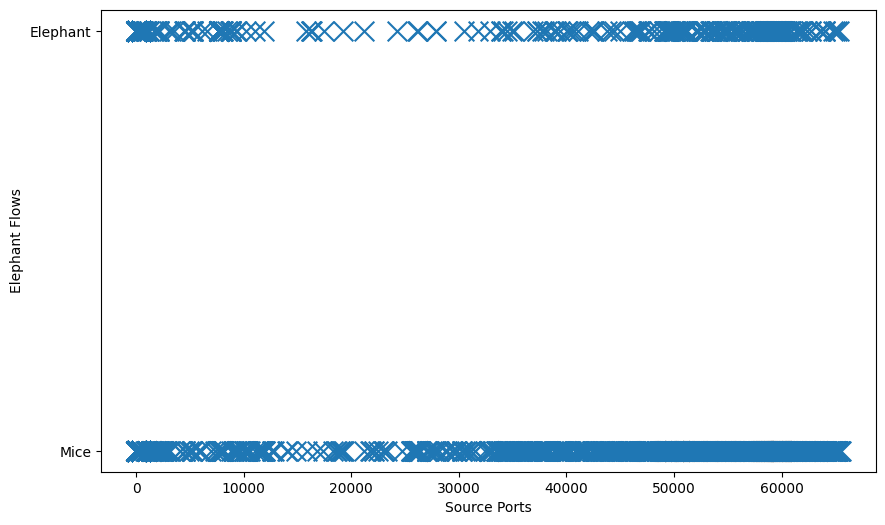

In [14]:
elephant = flows['elephant']
source_port = flows['src_port']

fg, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Elephant Flows')
ax.set_xlabel('Source Ports')
# ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
ax.set_yticks([0, 1], ['Mice', 'Elephant'])

ax.scatter(source_port, elephant, marker='x', s=200)
plt.show()

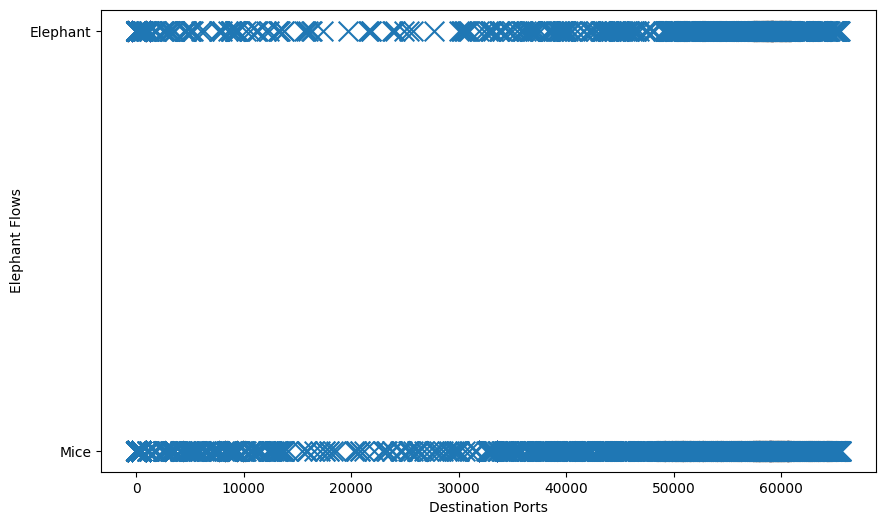

In [15]:
elephant = flows['elephant']
destination_port = flows['dst_port']

fg, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Elephant Flows')
ax.set_xlabel('Destination Ports')
# ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
ax.set_yticks([0, 1], ['Mice', 'Elephant'])

ax.scatter(destination_port, elephant, marker='x', s=200)
plt.show()

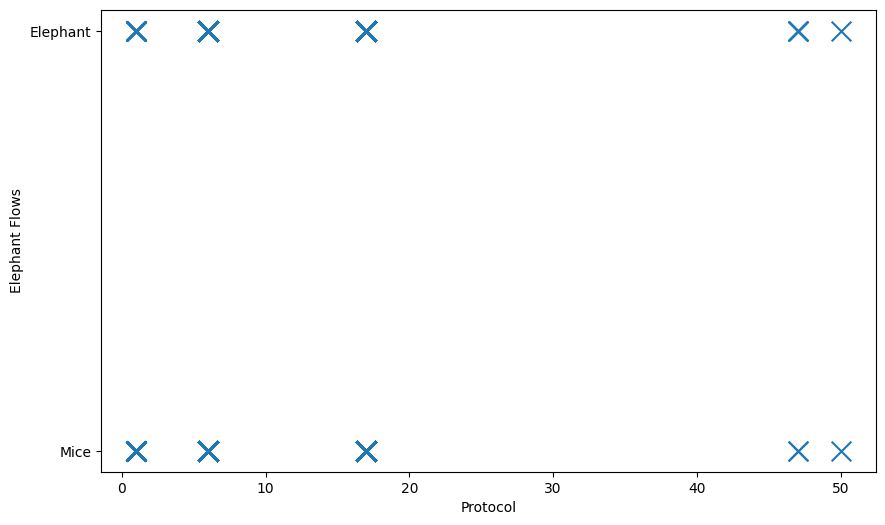

In [16]:
elephant = flows['elephant']
protocol = flows['protocol']

fg, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Elephant Flows')
ax.set_xlabel('Protocol')
# ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
ax.set_yticks([0, 1], ['Mice', 'Elephant'])

ax.scatter(protocol, elephant, marker='x', s=200)
plt.show()

In [17]:
# Finding relation between columns (correlation between columns)
data_corr = flows.corr()
print(data_corr)

                protocol  src_port  dst_port  first_pkt_size  flow_size  \
protocol        1.000000 -0.129416  0.092564        0.466802   0.046224   
src_port       -0.129416  1.000000 -0.823329       -0.051058  -0.071252   
dst_port        0.092564 -0.823329  1.000000        0.071080   0.064767   
first_pkt_size  0.466802 -0.051058  0.071080        1.000000   0.102356   
flow_size       0.046224 -0.071252  0.064767        0.102356   1.000000   
packet_count    0.130514 -0.002153 -0.025291        0.076180   0.781267   
elephant        0.001711 -0.174989  0.204979        0.013713   0.224201   

                packet_count  elephant  
protocol            0.130514  0.001711  
src_port           -0.002153 -0.174989  
dst_port           -0.025291  0.204979  
first_pkt_size      0.076180  0.013713  
flow_size           0.781267  0.224201  
packet_count        1.000000  0.219614  
elephant            0.219614  1.000000  


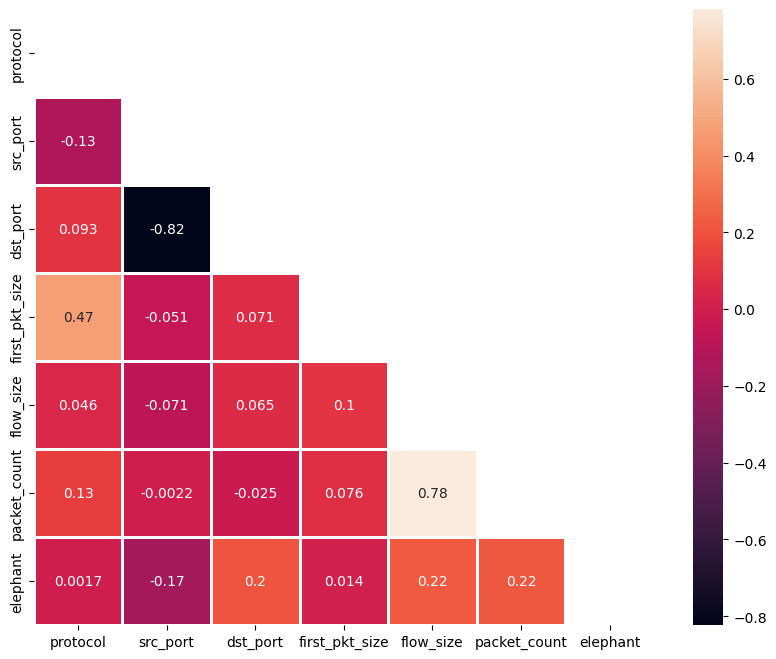

In [20]:
plt.figure(figsize=(10, 8))
matrix = np.triu(data_corr)
sns.heatmap(data_corr, annot = True, linewidth = 0.8, mask = matrix, cmap = 'rocket')
plt.show()